In [2]:
!pip install seaborn

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [27]:
data_taitanic=pd.read_csv('cleandata.csv')

In [28]:
data_taitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 10 columns):
PassengerId    886 non-null int64
Survived       886 non-null int64
Pclass         886 non-null int64
Sex            886 non-null object
Age            886 non-null float64
SibSp          886 non-null int64
Parch          886 non-null int64
Ticket         886 non-null object
Fare           886 non-null float64
Embarked       886 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.3+ KB


In [30]:
data_taitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,445.617381,0.380361,2.316027,29.197709,0.525959,0.382619,0.115858
std,257.048786,0.485750,0.832607,13.195487,1.105151,0.807656,0.156486
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,22.000000,0.000000,0.000000,0.030022
50%,445.500000,0.000000,3.000000,26.000000,0.000000,0.000000,0.054959
75%,666.750000,1.000000,3.000000,36.875000,1.000000,0.000000,0.116528
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000


In [34]:
#Look at numeric and categorical values seperately
df_num=data_taitanic[['Age','SibSp','Parch','Fare']]
df_cat=data_taitanic[['Survived','Pclass','Embarked','Sex']]

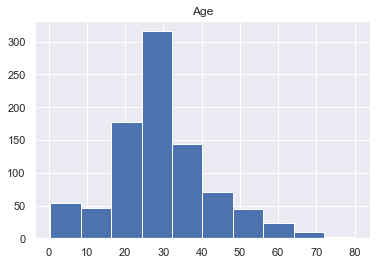

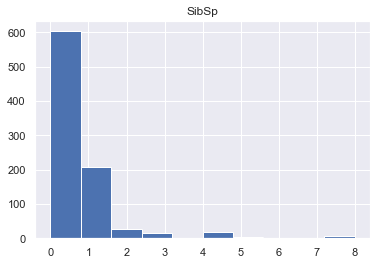

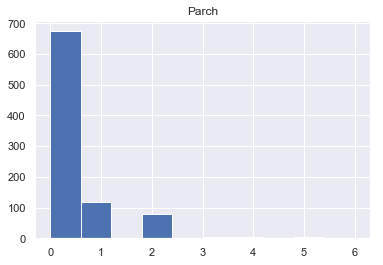

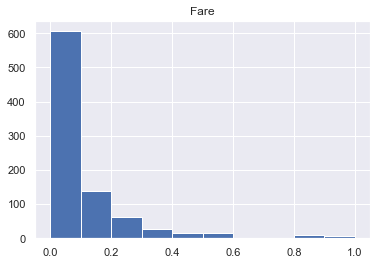

In [35]:
#Distribution for all numeric variables
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

In [36]:
#Compare survival rate across Age, SibSp, Parch, Fare. what is the average 'Age' of survival?
pd.pivot_table(data_taitanic, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,29.787796,0.084098,0.329690,0.553734
1,28.236409,0.167596,0.468843,0.480712


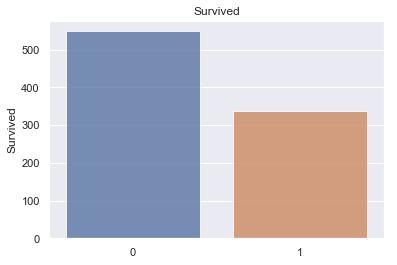

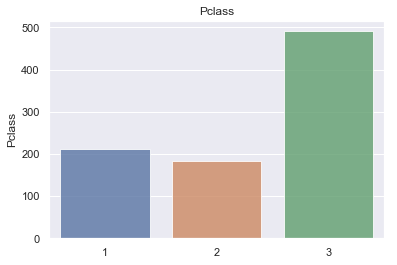

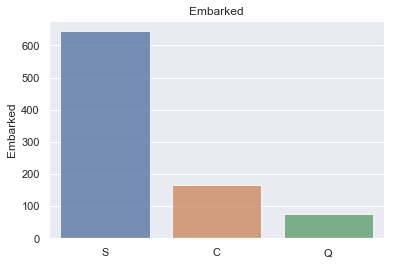

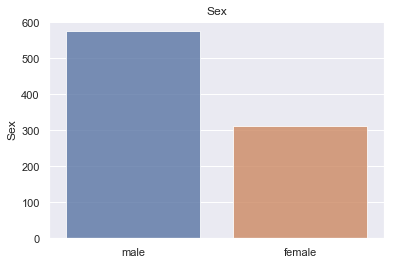

In [37]:
#Visualization of categorical data
for i in df_cat.columns:
  sns.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts(), alpha=0.8).set_title(i)
  plt.show()

In [38]:
print(pd.pivot_table(data_taitanic, index='Survived', columns='Pclass',values='Ticket',aggfunc='count'))



Pclass      1   2    3
Survived              
0          80  97  372
1         131  87  119


In [39]:
print(pd.pivot_table(data_taitanic, index='Survived', columns='Sex',values='Ticket',aggfunc='count'))

Sex       female  male
Survived              
0             81   468
1            230   107


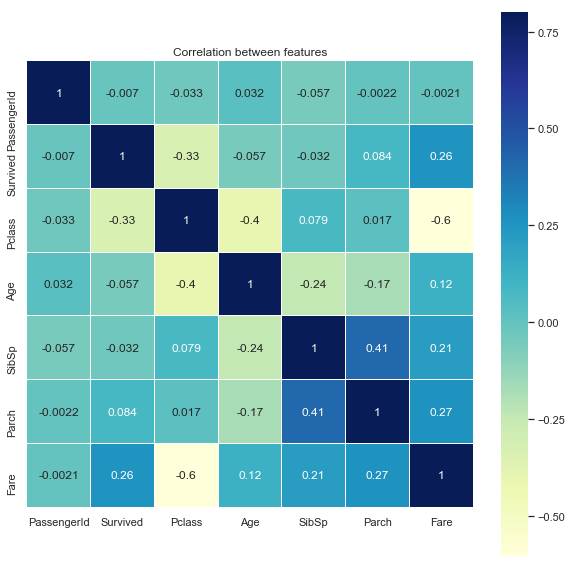

In [43]:
#Correlation between features
corr=data_taitanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

C:\Users\atena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


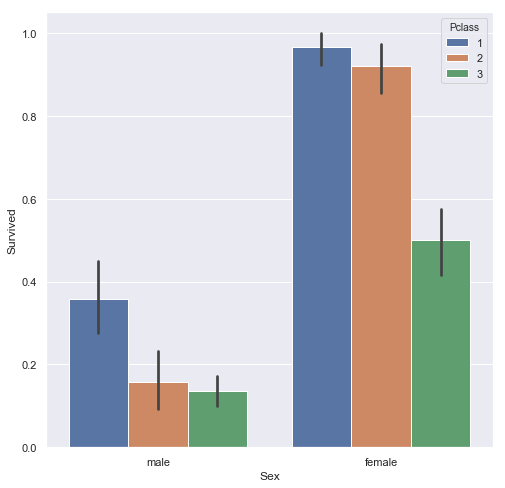

In [42]:
#Prediction of 'Survived' status based on some feature, these feature can be selected based on visualization and the correlation which they have with 'Survived' featur
plt.figure(figsize=(8,8))
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_cat)
plt.show()

C:\Users\atena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


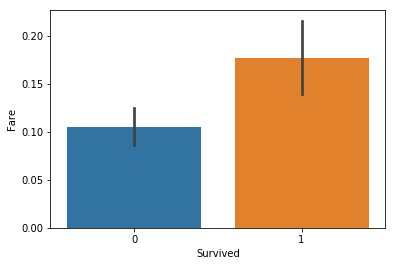

In [14]:
sns.barplot(x="Survived", y="Fare", data=data_taitanic)
plt.show()

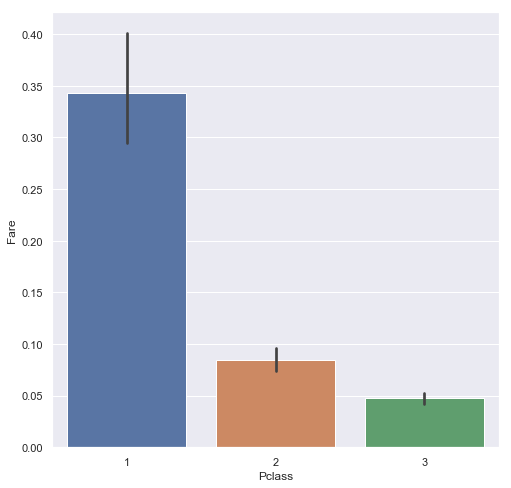

In [17]:
plt.figure(figsize=(8,8))
sns.barplot(x=data_taitanic['Pclass'], y=data_taitanic['Fare'] ,data=data_taitanic)
plt.show()

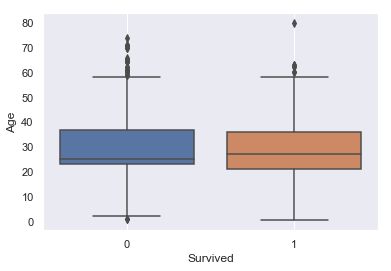

In [52]:
sns.boxplot(x="Survived",y="Age", data=data_taitanic)
plt.grid()

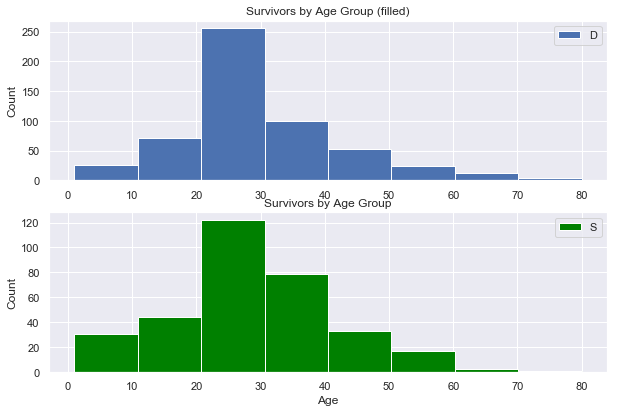

In [68]:
# Set figure size
plt.rc('figure', figsize=(10, 10))

# Setup a figue of plots

df1 = data_taitanic[data_taitanic['Survived'] == 0]['Age']
df2 = data_taitanic[data_taitanic['Survived'] == 1]['Age']

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')

max_age = max(data_taitanic['Age'])


plt.subplot(311)
plt.hist([df1], bins=8,range=(1, max_age),stacked=True)
plt.legend(('Died'), loc='best')
plt.title('Survivors by Age Group (filled)')
plt.ylabel('Count')


plt.subplot(312)
plt.hist([df2], bins=8,range=(1, max_age),stacked=True, color='green')
plt.legend(( 'Survived'), loc='best')
plt.title('Survivors by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')


plt.show()
